# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Reading DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path,encoding='latin-1',lineterminator='\n',error_bad_lines=False)

Skipping line 19: expected 8 fields, saw 10
Skipping line 150: expected 8 fields, saw 21
Skipping line 2159: expected 8 fields, saw 9
Skipping line 3129: expected 8 fields, saw 9
Skipping line 3426: expected 8 fields, saw 10
Skipping line 5753: expected 8 fields, saw 9
Skipping line 6784: expected 8 fields, saw 15
Skipping line 6947: expected 8 fields, saw 13
Skipping line 7355: expected 8 fields, saw 9
Skipping line 7468: expected 8 fields, saw 9
Skipping line 7606: expected 8 fields, saw 9
Skipping line 7674: expected 8 fields, saw 9
Skipping line 7778: expected 8 fields, saw 11
Skipping line 8282: expected 8 fields, saw 12
Skipping line 8289: expected 8 fields, saw 10
Skipping line 8951: expected 8 fields, saw 9
Skipping line 10204: expected 8 fields, saw 10
Skipping line 10576: expected 8 fields, saw 12
Skipping line 11978: expected 8 fields, saw 9
Skipping line 12675: expected 8 fields, saw 9
Skipping line 12989: expected 8 fields, saw 9
Skipping line 12994: expected 8 fields, saw

# EDA


In [ ]:
data.shape

(166571, 8)

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
166566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
166567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
166568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
166569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
166570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
data.drop_duplicates(subset=['comment_text'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160210 entries, 0 to 166570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             160209 non-null  object
 1   comment_text   160209 non-null  object
 2   toxic          159356 non-null  object
 3   severe_toxic   159146 non-null  object
 4   obscene        159030 non-null  object
 5   threat         158952 non-null  object
 6   insult         158915 non-null  object
 7   identity_hate  158886 non-null  object
dtypes: object(8)
memory usage: 11.0+ MB


In [ ]:
data.isnull().sum()

id                  1
comment_text        1
toxic             854
severe_toxic     1064
obscene          1180
threat           1258
insult           1295
identity_hate    1324
dtype: int64

In [ ]:
data.dropna('str'=='NaN',inplace=True)

In [ ]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
data.shape

(158886, 8)

In [ ]:
data.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
data['comment_text']=[comment_text.lower() for comment_text in data['comment_text']]
data['comment_text']=data['comment_text'].str.replace('http\S+',' ')
data['comment_text']=data['comment_text'].str.replace('\d+',' ')
data['comment_text']=data['comment_text'].str.replace('[^\w\s]',' ')
data['comment_text']=data['comment_text'].str.replace('\n',' ')
data.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the to...,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
data = data[data['toxic'].str.contains('[A-Z]+') == False]
data = data[data['severe_toxic'].str.contains('[A-Z]+') == False]
data = data[data['obscene'].str.contains('[A-Z]+') == False]
data = data[data['threat'].str.contains('[A-Z]+') == False]
data = data[data['insult'].str.contains('[A-Z]+') == False]
data = data[data['identity_hate'].str.contains('[A-Z]+') == False]

In [ ]:
data.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the to...,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data['toxic']=data['toxic'].astype(int)
data['severe_toxic']=data['severe_toxic'].astype(int)
data['obscene']=data['obscene'].astype(int)
data['threat']=data['threat'].astype(int)
data['insult']=data['insult'].astype(int)
data['identity_hate']=data['identity_hate'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158866 entries, 0 to 158865
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             158866 non-null  object
 1   comment_text   158866 non-null  object
 2   toxic          158866 non-null  int64 
 3   severe_toxic   158866 non-null  int64 
 4   obscene        158866 non-null  int64 
 5   threat         158866 non-null  int64 
 6   insult         158866 non-null  int64 
 7   identity_hate  158866 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
sum_row=data.iloc[:,2:].sum(axis=1)
no_label_comment = 0
for sum in sum_row:
    if sum==0:
        no_label_comment +=1

print("Total number of comments after processing = ",len(data))
print("Total number of comments without label after processing= ",no_label_comment)
print("Total count of labels after processing = ",sum_row.sum())

Total number of comments after processing =  158866
Total number of comments without label after processing=  142662
Total count of labels after processing =  35069


Total count of labels after processing =
 toxic            15279
severe_toxic      1595
obscene           8441
threat             478
insult            7872
identity_hate     1404
dtype: int64


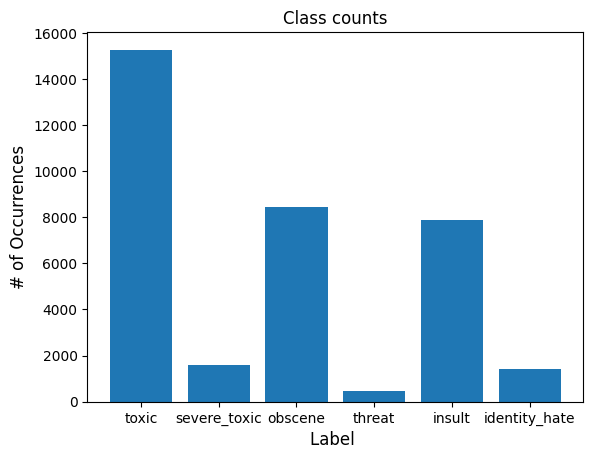

In [ ]:
sum_col=data.iloc[:,2:].sum()
plt.bar(sum_col.index, sum_col.values)
plt.title("Class counts")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)
print("Total count of labels after processing =\n", sum_col)
plt.show()

In [ ]:
sum_rows=data.iloc[:,2:].sum(axis=1)
label_comment_1 = 0
for sum in sum_row:
    if sum==1:
        label_comment_1 +=1
sum_rows=data.iloc[:,2:].sum(axis=1)
label_comment_2 = 0
for sum in sum_row:
    if sum==2:
        label_comment_2 +=1
label_comment_3 = 0
for sum in sum_row:
    if sum==3:
        label_comment_3 +=1
label_comment_4 = 0
for sum in sum_row:
    if sum==4:
        label_comment_4 +=1
label_comment_5 = 0
for sum in sum_row:
    if sum==5:
        label_comment_5 +=1
label_comment_6 = 0
for sum in sum_row:
    if sum==6:
        label_comment_6 +=1
No_Of_Lables={'No Of Lables':['1 Lable','2 Lables','3 Lables','4 Lables','5 Lables','6 Lables'],'Comments':[label_comment_1,label_comment_2,label_comment_3,label_comment_4,label_comment_5,label_comment_6]}
Lables_DF=pd.DataFrame(No_Of_Lables)
Lables_DF

,No Of Lables,Comments
0,1 Lable,6346
1,2 Lables,3474
2,3 Lables,4208
3,4 Lables,1760
4,5 Lables,385
5,6 Lables,31


Text(0, 0.5, 'Comment Count')

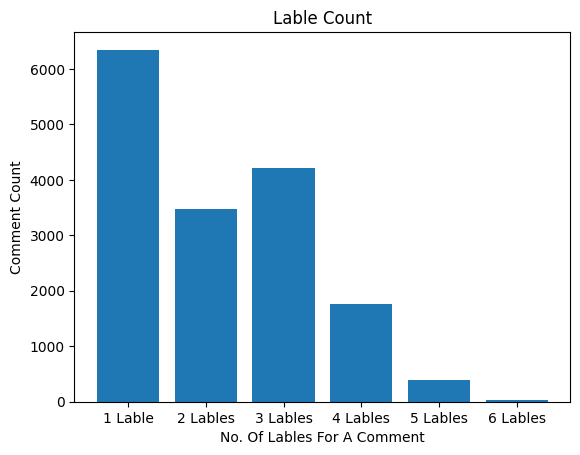

In [ ]:
plt.bar(Lables_DF['No Of Lables'],Lables_DF['Comments'])
plt.title('Lable Count')
plt.xlabel('No. Of Lables For A Comment')
plt.ylabel('Comment Count')

In [ ]:
Lable_Cols=data.iloc[:,2:]

<Axes: >

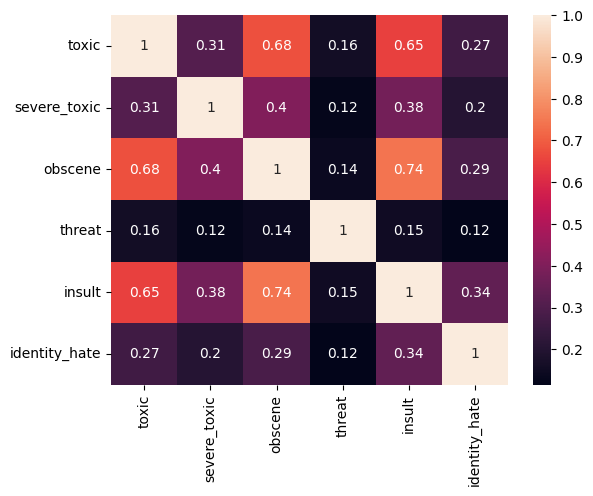

In [ ]:
sns.heatmap(Lable_Cols.corr(),annot=True)

All Comments

In [ ]:
comments_All=' '.join(data['comment_text'])
no_punc_comments_All=comments_All.translate(str.maketrans('','',string.punctuation))
no_url_comments_All=re.sub(r'http\S+', '', no_punc_comments_All)
comments_tokens_All=word_tokenize(no_url_comments_All)

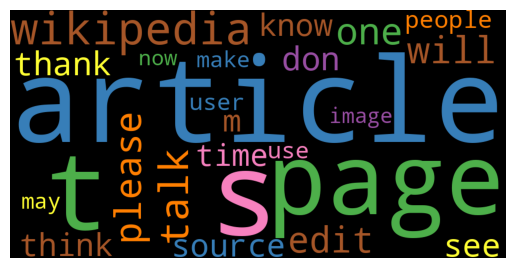

In [ ]:
comments_text_All=' '.join(comments_tokens_All)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_All)
plot_cloud(wordcloud)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

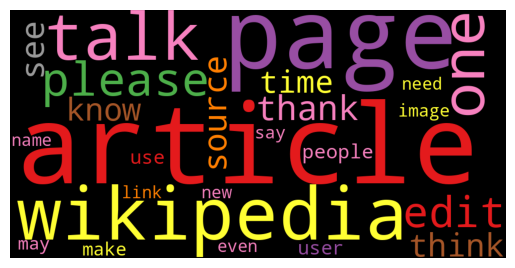

In [ ]:
stop_words=stopwords.words('english')
add_stop_words=['supertr0ll','dont','im','re','u','yourselfgo','youre','rvv','di','tommy2010','cant',"'re",'fuckin']
stop_words.extend(add_stop_words)
no_stop_comments=[word for word in comments_tokens_All if not word in stop_words]
no_stop_comments_All=" ".join(no_stop_comments)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_All=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_All)
plot_cloud(wordcloud_All)
print(stop_words)

In [ ]:
avg_len_comment=(data.comment_text.str.len().sum())/len(data)
print('Average Length of commemts is : ',avg_len_comment)
print('Maximum Length of commemts is : ',(data.comment_text.str.len().max()))
print('Minimum Length of commemts is : ',(data.comment_text.str.len().min()))

Average Length of commemts is :  383.7588974355746
Maximum Length of commemts is :  5000
Minimum Length of commemts is :  1


Toxic Comments


In [ ]:
data_toxic=data[data['toxic']==1]

In [ ]:
lower_words_toxic=data_toxic['comment_text']
comments_toxic=' '.join(lower_words_toxic)
no_punc_comments_toxic=comments_toxic.translate(str.maketrans('','',string.punctuation))
comments_tokens_toxic=word_tokenize(no_punc_comments_toxic)

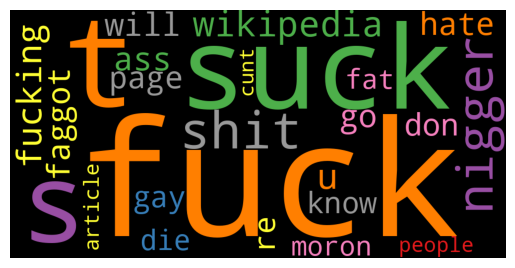

In [ ]:
comments_text_toxic=' '.join(comments_tokens_toxic)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_toxic)
plot_cloud(wordcloud)

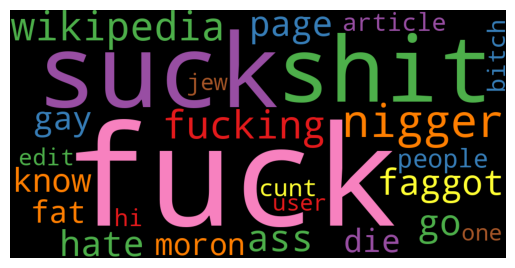

In [ ]:
no_stop_toxic=[word for word in comments_tokens_toxic if not word in stop_words]
no_stop_comments_toxic=" ".join(no_stop_toxic)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_toxic=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_toxic)
plot_cloud(wordcloud_toxic)

In [ ]:
avg_len_toxic=(data_toxic.comment_text.str.len().sum())/len(data_toxic)
print('Average Length of commemts in toxic lable is : ',avg_len_toxic)
print('Maximum Length of commemts in toxic lable is : ',(data_toxic.comment_text.str.len().max()))
print('Minimum Length of commemts in toxic lable is : ',(data_toxic.comment_text.str.len().min()))

Average Length of commemts in toxic lable is :  291.475161987041
Maximum Length of commemts in toxic lable is :  5000
Minimum Length of commemts in toxic lable is :  8


Severe Toxic

In [ ]:
data_severe_toxic=data[data['severe_toxic']==1]

In [ ]:
lower_words_severe_toxic=data_severe_toxic['comment_text']
comments_severe_toxic=' '.join(lower_words_severe_toxic)
no_punc_comments_severe_toxic=comments_severe_toxic.translate(str.maketrans('','',string.punctuation))
comments_tokens_severe_toxic=word_tokenize(no_punc_comments_severe_toxic)

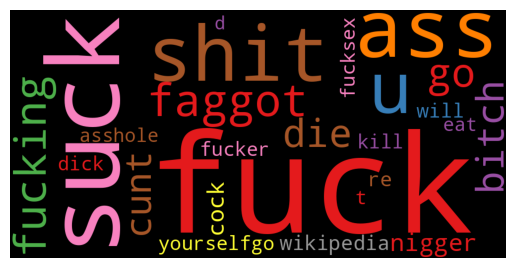

In [ ]:
comments_text_severe_toxic=' '.join(comments_tokens_severe_toxic)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_severe_toxic=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_severe_toxic)
plot_cloud(wordcloud_severe_toxic)

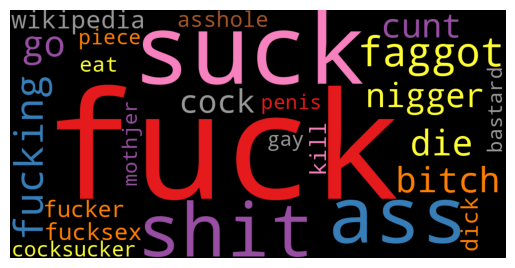

In [ ]:
no_stop_severe_toxic=[word for word in comments_tokens_severe_toxic if not word in stop_words]
no_stop_comments_severe_toxic=" ".join(no_stop_severe_toxic)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_severe_toxic_clean=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_severe_toxic)
plot_cloud(wordcloud_severe_toxic_clean)

In [ ]:
avg_len_severe_toxic=(data_severe_toxic.comment_text.str.len().sum())/len(data_severe_toxic)
print('Average Length of commemts in severe toxic lable is : ',avg_len_severe_toxic)
print('Maximum Length of commemts in severe toxic lable is : ',(data_severe_toxic.comment_text.str.len().max()))
print('Minimum Length of commemts in severe toxic lable is : ',(data_severe_toxic.comment_text.str.len().min()))

Average Length of commemts in severe toxic lable is :  449.34796238244513
Maximum Length of commemts in severe toxic lable is :  5000
Minimum Length of commemts in severe toxic lable is :  8


Obscene


In [ ]:
data_obscene=data[data['obscene']==1]

In [ ]:
lower_words_obscene=data_obscene['comment_text']
comments_obscene=' '.join(lower_words_obscene)
no_punc_comments_obscene=comments_obscene.translate(str.maketrans('','',string.punctuation))
no_url_comments_obscene=re.sub(r'http\S+', '', no_punc_comments_obscene)
comments_tokens_obscene=word_tokenize(no_url_comments_obscene)

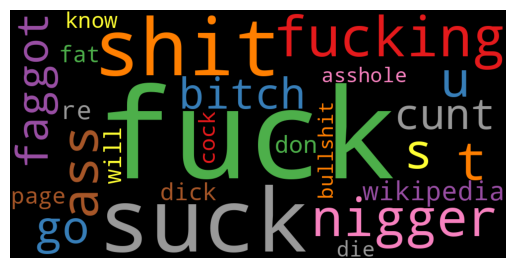

In [ ]:
comments_text_obscene=' '.join(comments_tokens_obscene)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_obscene=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_obscene)
plot_cloud(wordcloud_obscene)

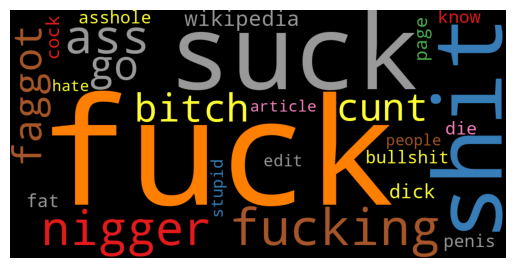

In [ ]:
no_stop_obscene=[word for word in comments_tokens_obscene if not word in stop_words]
no_stop_comments_obscene=" ".join(no_stop_obscene)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_obscene_clean=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_obscene)
plot_cloud(wordcloud_obscene_clean)

In [ ]:
avg_len_obscene=(data_obscene.comment_text.str.len().sum())/len(data_obscene)
print('Average Length of commemts in obscene lable is : ',avg_len_obscene)
print('Maximum Length of commemts in obscene lable is : ',(data_obscene.comment_text.str.len().max()))
print('Minimum Length of commemts in obscene lable is : ',(data_obscene.comment_text.str.len().min()))

Average Length of commemts in obscene lable is :  281.6461319748845
Maximum Length of commemts in obscene lable is :  5000
Minimum Length of commemts in obscene lable is :  8


Threat

In [ ]:
data_threat=data[data['threat']==1]

In [ ]:
lower_words_threat=data_threat['comment_text']
comments_threat=' '.join(lower_words_threat)
no_punc_comments_threat=comments_threat.translate(str.maketrans('','',string.punctuation))
no_url_comments_threat=re.sub(r'http\S+', '', no_punc_comments_threat)
comments_tokens_threat=word_tokenize(no_url_comments_threat)
comments_text_threat=' '.join(comments_tokens_threat)

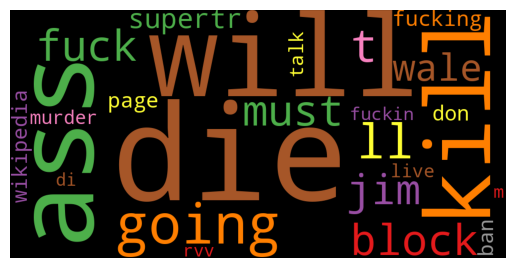

In [ ]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_threat=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_threat)
plot_cloud(wordcloud_threat)

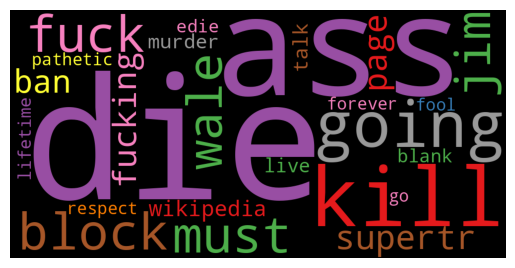

In [ ]:
no_stop_threat=[word for word in comments_tokens_threat if not word in stop_words]
no_stop_comments_threat=" ".join(no_stop_threat)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_threat_clean=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_threat)
plot_cloud(wordcloud_threat_clean)

In [ ]:
avg_len_threat=(data_threat.comment_text.str.len().sum())/len(data_threat)
print('Average Length of commemts in threat lable is : ',avg_len_threat)
print('Maximum Length of commemts in threat lable is : ',(data_threat.comment_text.str.len().max()))
print('Minimum Length of commemts in threat lable is : ',(data_threat.comment_text.str.len().min()))

Average Length of commemts in threat lable is :  299.14435146443515
Maximum Length of commemts in threat lable is :  5000
Minimum Length of commemts in threat lable is :  19


Insult

In [ ]:
data_insult=data[data['insult']==1]

In [ ]:
lower_words_insult=[comment_text.lower() for comment_text in data_insult['comment_text']]
comments_insult=' '.join(lower_words_insult)
no_punc_comments_insult=comments_insult.translate(str.maketrans('','',string.punctuation))
no_url_comments_insult=re.sub(r'http\S+', '', no_punc_comments_insult)
comments_tokens_insult=word_tokenize(no_url_comments_insult)
comments_text_insult=' '.join(comments_tokens_insult)

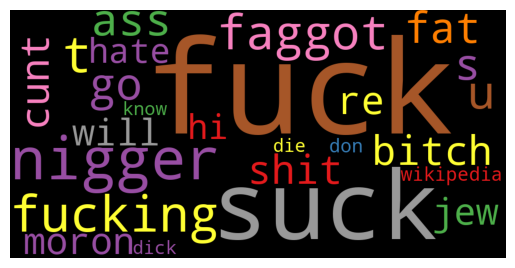

In [ ]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_insult=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_insult)
plot_cloud(wordcloud_insult)

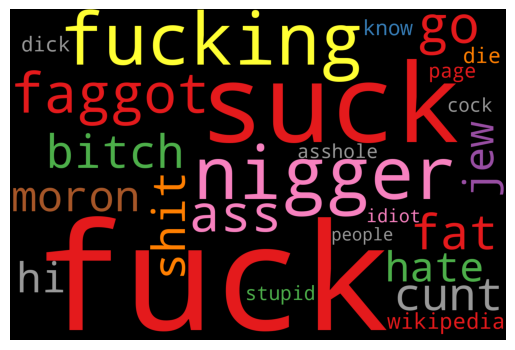

In [ ]:
no_stop_insult=[word for word in comments_tokens_insult if not word in stop_words]
no_stop_comments_insult=" ".join(no_stop_insult)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_insult_clean=WordCloud(width=1500,height=1000,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_insult)
plot_cloud(wordcloud_insult_clean)

In [ ]:
avg_len_insult=data_insult.comment_text.str.len().sum()/len(data_insult)
print('Average Length of commemts in insult lable is : ',avg_len_insult)
print('Maximum Length of commemts in insult lable is : ',(data_insult.comment_text.str.len().max()))
print('Minimum Length of commemts in insult lable is : ',(data_insult.comment_text.str.len().min()))

Average Length of commemts in insult lable is :  273.8769054878049
Maximum Length of commemts in insult lable is :  5000
Minimum Length of commemts in insult lable is :  8


Identity Hate

In [ ]:
data_identity_hate=data[data['identity_hate']==1]

In [ ]:
lower_words_id_hate=[comment_text.lower() for comment_text in data_identity_hate['comment_text']]
comments_id_hate=' '.join(lower_words_id_hate)
no_punc_comments_id_hate=comments_id_hate.translate(str.maketrans('','',string.punctuation))
no_url_comments_id_hate=re.sub(r'http\S+', '', no_punc_comments_id_hate)
comments_tokens_id_hate=word_tokenize(no_url_comments_id_hate)
comments_text_id_hate=' '.join(comments_tokens_id_hate)

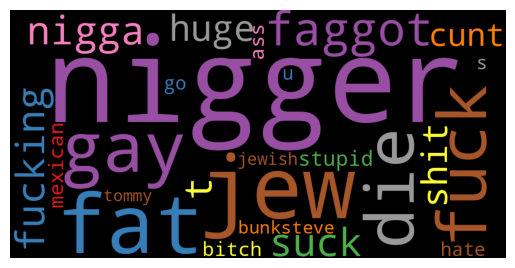

In [ ]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_id_hate=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_id_hate)
plot_cloud(wordcloud_id_hate)

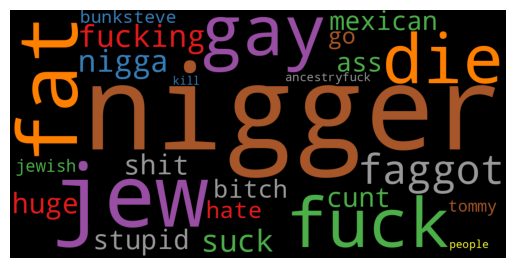

In [ ]:
no_stop_id_hate=[word for word in comments_tokens_id_hate if not word in stop_words]
no_stop_comments_id_hate=" ".join(no_stop_id_hate)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_id_hate_clean=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_id_hate)
plot_cloud(wordcloud_id_hate_clean)

In [ ]:
avg_len_id_hate=data_identity_hate.comment_text.str.len().sum()/len(data_identity_hate)
print('Average Length of commemts in identity hate lable is : ',avg_len_id_hate)
print('Maximum Length of commemts in identity hate lable is : ',(data_identity_hate.comment_text.str.len().max()))
print('Minimum Length of commemts in identity hate lable is : ',(data_identity_hate.comment_text.str.len().min()))

Average Length of commemts in identity hate lable is :  302.4928774928775
Maximum Length of commemts in identity hate lable is :  5000
Minimum Length of commemts in identity hate lable is :  18


No Lable Comments

In [ ]:
data_no_label=data[data.iloc[:,2:].sum(axis=1)==0]

In [ ]:
lower_words_no_label=[comment_text.lower() for comment_text in data_no_label['comment_text']]
comments_no_label=' '.join(lower_words_no_label)
no_punc_comments_no_label=comments_no_label.translate(str.maketrans('','',string.punctuation))
no_url_comments_no_label=re.sub(r'http\S+', '', no_punc_comments_no_label)
comments_tokens_no_label=word_tokenize(no_url_comments_no_label)
comments_text_no_label=' '.join(comments_tokens_no_label)

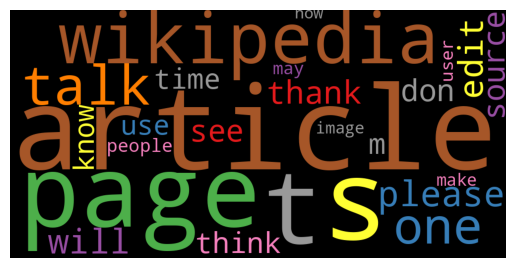

In [ ]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_no_label=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',collocations=False).generate(comments_text_no_label)
plot_cloud(wordcloud_no_label)

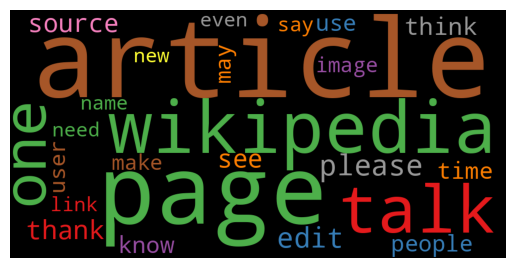

In [ ]:
no_stop_no_label=[word for word in comments_tokens_no_label if not word in stop_words]
no_stop_comments_no_label=" ".join(no_stop_no_label)
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud_no_label_clean=WordCloud(width=1000,height=500,background_color='black',max_words=25,
                   colormap='Set1',stopwords=STOPWORDS,collocations=False).generate(no_stop_comments_no_label)
plot_cloud(wordcloud_no_label_clean)

In [ ]:
avg_len_no_label=data_no_label.comment_text.str.len().sum()/len(data_no_label)
print('Average Length of commemts in identity hate lable is : ',avg_len_no_label)
print('Maximum Length of commemts in identity hate lable is : ',(data_no_label.comment_text.str.len().max()))
print('Minimum Length of commemts in identity hate lable is : ',(data_no_label.comment_text.str.len().min()))

Average Length of commemts in identity hate lable is :  393.4180720864701
Maximum Length of commemts in identity hate lable is :  5000
Minimum Length of commemts in identity hate lable is :  1


In [ ]:
avg_All_nsw=len(no_stop_comments_All)/len(data)
avg_toxic_nsw=len(no_stop_comments_toxic)/len(data_toxic)
avg_sev_toxic_nsw=len(no_stop_comments_severe_toxic)/len(data_severe_toxic)
avg_obscene_nsw=len(no_stop_comments_obscene)/len(data_obscene)
avg_threat_nsw=len(no_stop_comments_threat)/len(data_threat)
avg_insult_nsw=len(no_stop_comments_insult)/len(data_insult)
avg_id_hate_nsw=len(no_stop_comments_id_hate)/len(data_identity_hate)
avg_no_label_nsw=len(no_stop_comments_no_label)/len(data_no_label)

In [ ]:
length={'Labels':['All Comments','Toxic Comments','Severe Toxic Comments','Obscene Comments','Threat Comments','Insult Comments','Identity Hate Comments','No Label Comments'] ,'Average Length ':[avg_len_comment,avg_len_toxic,avg_len_severe_toxic,avg_len_obscene,avg_len_threat,avg_len_insult,avg_len_id_hate,avg_len_no_label],'Average after SW':[avg_All_nsw,avg_toxic_nsw,avg_sev_toxic_nsw,avg_obscene_nsw,avg_threat_nsw,avg_insult_nsw,avg_id_hate_nsw,avg_no_label_nsw]}
Avg_Length=pd.DataFrame(length)
Avg_Length

,Labels,Average Length,Average after SW
0,All Comments,383.758897,241.188788
1,Toxic Comments,291.475162,183.701224
2,Severe Toxic Comments,449.347962,297.660815
3,Obscene Comments,281.646132,179.737590
4,Threat Comments,299.144351,167.725941
5,Insult Comments,273.876905,173.694614
6,Identity Hate Comments,302.492877,210.646724
7,No Label Comments,393.418072,247.266462


In [ ]:
most_occur_All  =pd.DataFrame(Counter(no_stop_comments).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_toxic =pd.DataFrame(Counter(no_stop_toxic).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_severe_toxic =pd.DataFrame(Counter(no_stop_severe_toxic).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_obscene =pd.DataFrame(Counter(no_stop_obscene).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_threat =pd.DataFrame(Counter(no_stop_threat).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_insult =pd.DataFrame(Counter(no_stop_insult).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_id_hate =pd.DataFrame(Counter(no_stop_id_hate).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_no_labels =pd.DataFrame(Counter(no_stop_no_label).most_common(),columns=['Words','Occurances'])

In [ ]:
most_occur_toxic.assign(most_occur_severe_toxic=most_occur_toxic.Words.isin(most_occur_severe_toxic.Words),most_occur_obscene=most_occur_toxic.Words.isin(most_occur_obscene.Words),
                        most_occur_threat=most_occur_toxic.Words.isin(most_occur_threat.Words),most_occur_insult=most_occur_toxic.Words.isin(most_occur_insult.Words),
                        most_occur_id_hate=most_occur_toxic.Words.isin(most_occur_id_hate.Words)).head(15)

,Words,Occurances,most_occur_severe_toxic,most_occur_obscene,most_occur_threat,most_occur_insult,most_occur_id_hate
0,fuck,9935,True,True,True,True,True
1,shit,3623,True,True,True,True,True
2,like,3503,True,True,True,True,True
3,wikipedia,3422,True,True,True,True,True
4,nigger,3299,True,True,True,True,True
5,fucking,3288,True,True,True,True,True
6,suck,3234,True,True,True,True,True
7,ass,2938,True,True,True,True,True
8,go,2860,True,True,True,True,True
9,hate,2629,True,True,True,True,True


In [ ]:
most_occur_severe_toxic.assign(most_occur_toxic=most_occur_severe_toxic.Words.isin(most_occur_toxic.Words),most_occur_obscene=most_occur_severe_toxic.Words.isin(most_occur_obscene.Words),
                               most_occur_threat=most_occur_severe_toxic.Words.isin(most_occur_threat.Words), most_occur_insult=most_occur_severe_toxic.Words.isin(most_occur_insult.Words),
                               most_occur_id_hate=most_occur_severe_toxic.Words.isin(most_occur_id_hate.Words)).head(15)

,Words,Occurances,most_occur_toxic,most_occur_obscene,most_occur_threat,most_occur_insult,most_occur_id_hate
0,fuck,7304,True,True,True,True,True
1,suck,2535,True,True,True,True,True
2,ass,2115,True,True,True,True,True
3,shit,1885,True,True,True,True,True
4,faggot,1571,True,True,True,True,True
5,fucking,1456,True,True,True,True,True
6,go,1241,True,True,True,True,True
7,die,1156,True,True,True,True,True
8,bitch,1113,True,True,True,True,True
9,nigger,1012,True,True,True,True,True


In [ ]:
most_occur_obscene.assign(most_occur_toxic=most_occur_obscene.Words.isin(most_occur_toxic.Words),most_occur_severe_toxic=most_occur_obscene.Words.isin(most_occur_severe_toxic.Words),
                               most_occur_threat=most_occur_obscene.Words.isin(most_occur_threat.Words), most_occur_insult=most_occur_obscene.Words.isin(most_occur_insult.Words),
                               most_occur_id_hate=most_occur_obscene.Words.isin(most_occur_id_hate.Words)).head(15)

,Words,Occurances,most_occur_toxic,most_occur_severe_toxic,most_occur_threat,most_occur_insult,most_occur_id_hate
0,fuck,9863,True,True,True,True,True
1,shit,3214,True,True,True,True,True
2,fucking,3188,True,True,True,True,True
3,suck,3020,True,True,True,True,True
4,ass,2844,True,True,True,True,True
5,nigger,2726,True,True,True,True,True
6,go,2142,True,True,True,True,True
7,bitch,1797,True,True,True,True,True
8,wikipedia,1695,True,True,True,True,True
9,cunt,1533,True,True,True,True,True


In [ ]:
most_occur_threat.assign(most_occur_toxic=most_occur_threat.Words.isin(most_occur_toxic.Words),most_occur_severe_toxic=most_occur_threat.Words.isin(most_occur_severe_toxic.Words),
                               most_occur_obscene=most_occur_threat.Words.isin(most_occur_obscene.Words), most_occur_insult=most_occur_threat.Words.isin(most_occur_insult.Words),
                               most_occur_id_hate=most_occur_threat.Words.isin(most_occur_id_hate.Words)).head(15)

,Words,Occurances,most_occur_toxic,most_occur_severe_toxic,most_occur_obscene,most_occur_insult,most_occur_id_hate
0,die,1168,True,True,True,True,True
1,ass,772,True,True,True,True,True
2,kill,504,True,True,True,True,True
3,going,294,True,True,True,True,True
4,block,170,True,True,True,True,True
5,must,167,True,True,True,True,True
6,fuck,166,True,True,True,True,True
7,jim,158,True,True,True,True,True
8,wales,157,True,True,True,True,True
9,supertr,152,True,False,True,True,False


In [ ]:
most_occur_insult.assign(most_occur_toxic=most_occur_insult.Words.isin(most_occur_toxic.Words),most_occur_severe_toxic=most_occur_insult.Words.isin(most_occur_severe_toxic.Words),
                               most_occur_obscene=most_occur_insult.Words.isin(most_occur_obscene.Words), most_occur_threat=most_occur_insult.Words.isin(most_occur_threat.Words),
                               most_occur_id_hate=most_occur_insult.Words.isin(most_occur_id_hate.Words)).head(15)

,Words,Occurances,most_occur_toxic,most_occur_severe_toxic,most_occur_obscene,most_occur_threat,most_occur_id_hate
0,fuck,7929,True,True,True,True,True
1,fucking,2796,True,True,True,True,True
2,suck,2791,True,True,True,True,True
3,nigger,2780,True,True,True,True,True
4,go,2232,True,True,True,True,True
5,ass,2209,True,True,True,True,True
6,fat,1926,True,True,True,True,True
7,faggot,1866,True,True,True,True,True
8,bitch,1735,True,True,True,True,True
9,shit,1691,True,True,True,True,True


In [ ]:
most_occur_id_hate.assign(most_occur_toxic=most_occur_id_hate.Words.isin(most_occur_toxic.Words),most_occur_severe_toxic=most_occur_id_hate.Words.isin(most_occur_severe_toxic.Words),
                               most_occur_obscene=most_occur_id_hate.Words.isin(most_occur_obscene.Words), most_occur_threat=most_occur_id_hate.Words.isin(most_occur_threat.Words),
                               most_occur_insult=most_occur_id_hate.Words.isin(most_occur_insult.Words)).head(15)

,Words,Occurances,most_occur_toxic,most_occur_severe_toxic,most_occur_obscene,most_occur_threat,most_occur_insult
0,nigger,2969,True,True,True,True,True
1,fat,1322,True,True,True,True,True
2,jew,1315,True,True,True,True,True
3,gay,918,True,True,True,True,True
4,fuck,879,True,True,True,True,True
5,die,879,True,True,True,True,True
6,faggot,742,True,True,True,True,True
7,fucking,518,True,True,True,True,True
8,huge,430,True,True,True,True,True
9,suck,427,True,True,True,True,True


In [ ]:
words_toxic_severe=pd.DataFrame(most_occur_toxic.Words.isin(most_occur_severe_toxic.Words))
words_toxic_severe.value_counts()

Words
False    25597
True      5784
dtype: int64

In [ ]:
words_toxic_obscene=pd.DataFrame(most_occur_toxic.Words.isin(most_occur_obscene.Words))
words_toxic_obscene.value_counts()

Words
True     19594
False    11787
dtype: int64

In [ ]:
words_toxic_threat=pd.DataFrame(most_occur_toxic.Words.isin(most_occur_threat.Words))
words_toxic_threat.value_counts()

Words
False    28562
True      2819
dtype: int64

In [ ]:
words_toxic_insult=pd.DataFrame(most_occur_toxic.Words.isin(most_occur_insult.Words))
words_toxic_insult.value_counts()

Words
True     18527
False    12854
dtype: int64

In [ ]:
words_toxic_id_hate=pd.DataFrame(most_occur_toxic.Words.isin(most_occur_id_hate.Words))
words_toxic_id_hate.value_counts()

Words
False    24569
True      6812
dtype: int64

In [ ]:
words_severe_toxic=pd.DataFrame(most_occur_severe_toxic.Words.isin(most_occur_toxic.Words))
words_severe_toxic.value_counts()

Words
True     5784
dtype: int64

In [ ]:
words_severe_obscene=pd.DataFrame(most_occur_severe_toxic.Words.isin(most_occur_obscene.Words))
words_severe_obscene.value_counts()

Words
True     5703
False      81
dtype: int64

In [ ]:
words_severe_threat=pd.DataFrame(most_occur_severe_toxic.Words.isin(most_occur_threat.Words))
words_severe_threat.value_counts()

Words
False    4022
True     1762
dtype: int64

In [ ]:
words_severe_insult=pd.DataFrame(most_occur_severe_toxic.Words.isin(most_occur_insult.Words))
words_severe_insult.value_counts()

Words
True     5582
False     202
dtype: int64

In [ ]:
words_severe_id_hate=pd.DataFrame(most_occur_severe_toxic.Words.isin(most_occur_id_hate.Words))
words_severe_id_hate.value_counts()

Words
True     3312
False    2472
dtype: int64

In [ ]:
words_obscene_toxic=pd.DataFrame(most_occur_obscene.Words.isin(most_occur_toxic.Words))
words_obscene_toxic.value_counts()

Words
True     19594
False     1032
dtype: int64

In [ ]:
words_obscene_severe=pd.DataFrame(most_occur_obscene.Words.isin(most_occur_severe_toxic.Words))
words_obscene_severe.value_counts()

Words
False    14923
True      5703
dtype: int64

In [ ]:
words_obscene_threat=pd.DataFrame(most_occur_obscene.Words.isin(most_occur_threat.Words))
words_obscene_threat.value_counts()

Words
False    17907
True      2719
dtype: int64

In [ ]:
words_obscene_insult=pd.DataFrame(most_occur_obscene.Words.isin(most_occur_insult.Words))
words_obscene_insult.value_counts()

Words
True     16843
False     3783
dtype: int64

In [ ]:
words_obscene_id_hate=pd.DataFrame(most_occur_obscene.Words.isin(most_occur_id_hate.Words))
words_obscene_id_hate.value_counts()

Words
False    14213
True      6413
dtype: int64

In [ ]:
words_threat_toxic=pd.DataFrame(most_occur_threat.Words.isin(most_occur_toxic.Words))
words_threat_toxic.value_counts()

Words
True     2819
False      29
dtype: int64

In [ ]:
words_threat_severe=pd.DataFrame(most_occur_threat.Words.isin(most_occur_severe_toxic.Words))
words_threat_severe.value_counts()

Words
True     1762
False    1086
dtype: int64

In [ ]:
words_threat_obscene=pd.DataFrame(most_occur_threat.Words.isin(most_occur_obscene.Words))
words_threat_obscene.value_counts()

Words
True     2719
False     129
dtype: int64

In [ ]:
words_threat_insult=pd.DataFrame(most_occur_threat.Words.isin(most_occur_insult.Words))
words_threat_insult.value_counts()

Words
True     2709
False     139
dtype: int64

In [ ]:
words_threat_id_hate=pd.DataFrame(most_occur_threat.Words.isin(most_occur_id_hate.Words))
words_threat_id_hate.value_counts()

Words
True     1972
False     876
dtype: int64

In [ ]:
words_insult_id_hate=pd.DataFrame(most_occur_insult.Words.isin(most_occur_id_hate.Words))
words_insult_id_hate.value_counts()

Words
False    12928
True      6528
dtype: int64

In [ ]:
words_id_hate=pd.DataFrame(most_occur_id_hate.Words.isin(most_occur_id_hate.Words))
words_id_hate.value_counts()

Words
True     7084
dtype: int64

In [ ]:
data['cleaned_comments'] = data['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comments
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,sir hero chance remember page
...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0,second time asking view completely contradicts...
158862,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,ashamed horrible thing put talk page
158863,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,spitzer umm theres actual article prostitution...
158864,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,looks like actually put speedy first version d...


In [ ]:
clean_comments=' '.join(data['cleaned_comments'])
cleaned_tokens=word_tokenize(clean_comments)

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
data['lemmatized_comments'] = data['cleaned_comments'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))

In [ ]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comments,lemmatized_comments
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...,explanation edit make username hardcore metall...
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,aww match background colour seemingly stuck th...
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...,hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,make real suggestions improvement wondered sec...,make real suggestion improvement wonder sectio...
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,sir hero chance remember page,sir hero chance remember page
...,...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0,second time asking view completely contradicts...,second time ask view completely contradict cov...
158862,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,ashamed horrible thing put talk page,ashamed horrible thing put talk page
158863,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,spitzer umm theres actual article prostitution...,spitzer umm there s actual article prostitutio...
158864,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,looks like actually put speedy first version d...,look like actually put speedy first version de...


In [ ]:
# data.to_csv('comments',encoding='latin-1')

# Model Building

Spliting Train & Test

In [ ]:
x = data["lemmatized_comments"]
y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

TF-IDF Vectorizer

In [ ]:
# initializing TfidfVectorizer
vectorizer_tf = TfidfVectorizer(max_df=0.5,ngram_range=(1,1))

# fitting the tf-idf on the given data
vectorizer_tf.fit(x)

# transforming the data
x_train_tfidf= vectorizer_tf.transform(x_train)
x_test_tfidf= vectorizer_tf.transform(x_test)

# Finding Vectorizer's length and shape of array
print(len(vectorizer_tf.vocabulary_))
#print(x_train_tfidf_1.toarray())
#print(x_train_tfidf.toarray().shape)

151445


In [ ]:
moc=MultiOutputClassifier(LogisticRegression())
model_tfidf=moc.fit(x_train_tfidf,y_train)
y_pred_tf=model_tfidf.predict(x_test_tfidf)
print(accuracy_score(y_test,y_pred_tf))
print(classification_report(y_test,y_pred_tf))

0.9211917750734369
              precision    recall  f1-score   support

           0       0.92      0.60      0.73      4514
           1       0.60      0.23      0.34       499
           2       0.92      0.64      0.76      2514
           3       0.63      0.08      0.14       150
           4       0.83      0.51      0.63      2323
           5       0.77      0.13      0.22       449

   micro avg       0.89      0.55      0.68     10449
   macro avg       0.78      0.37      0.47     10449
weighted avg       0.88      0.55      0.66     10449
 samples avg       0.05      0.05      0.05     10449



Count Vectorizer

In [ ]:
count_vec=CountVectorizer(ngram_range=(1,1),max_df=0.5)

# fitting the count vectorizer on the given data
count_vec.fit(x)

# transforming the data
x_train_cv= count_vec.transform(x_train)
x_test_cv= count_vec.transform(x_test)
print(len(count_vec.vocabulary_))

151445


In [ ]:
model_cv=moc.fit(x_train_cv,y_train)
y_pred_cv=model_cv.predict(x_test_cv)
print(accuracy_score(y_test,y_pred_cv))
print(classification_report(y_test,y_pred_cv))

0.9142257658413764
              precision    recall  f1-score   support

           0       0.84      0.69      0.75      4514
           1       0.55      0.29      0.38       499
           2       0.87      0.69      0.77      2514
           3       0.29      0.16      0.21       150
           4       0.75      0.50      0.60      2323
           5       0.49      0.17      0.25       449

   micro avg       0.81      0.60      0.69     10449
   macro avg       0.63      0.42      0.49     10449
weighted avg       0.79      0.60      0.68     10449
 samples avg       0.06      0.05      0.05     10449



***Comaparison Between TF-IDF and Count Vectorizer***

*   The Weighted Average of Precission using Count Vectorizer is decreasing by 9 %  compared to TFIDF Vectorizer.
*   The Weighed Average  of Recall using Count Vectorizer is increasing by 5 % comapred to TF-TDF Vectorizer.
*   THe Weighed Average of F1_Score using Count Vectorizer is increasing by 2 % compared to TF-IDF Vectorizer.

Recall and F1-Score of the model using Count Vectorizer is good compared to the TF-IDF Vectorizer. So we are building Models using Count Vectorization Method.   


***Why Weighted Average ?***

The output average would consider the contribution of each class as weighted by
the number of examples of that given class.




Logistic Regession -Balanced Weights (Auto Balance)

In [ ]:
# Naming the Model
mlr=MultiOutputClassifier(LogisticRegression(class_weight='balanced'))

# Fitinf the values of x in count vectoeizer
count_vec.fit(x)

# Transforming the Dataset
x_train_cv_br= count_vec.transform(x_train)
x_test_cv_br= count_vec.transform(x_test)

#Training and prediction
model_lr_a=mlr.fit(x_train_cv_br,y_train)
y_pred_lr=model_lr_a.predict(x_test_cv_br)
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr,target_names=['Toxic', 'Severe Toxic', 'Obscene','Threat', 'Insult', 'Identity Hate']))

0.8718002517834662
               precision    recall  f1-score   support

        Toxic       0.67      0.84      0.74      4514
 Severe Toxic       0.28      0.84      0.42       499
      Obscene       0.66      0.88      0.76      2514
       Threat       0.21      0.59      0.31       150
       Insult       0.51      0.84      0.64      2323
Identity Hate       0.21      0.60      0.31       449

    micro avg       0.55      0.83      0.66     10449
    macro avg       0.42      0.76      0.53     10449
 weighted avg       0.59      0.83      0.68     10449
  samples avg       0.06      0.08      0.07     10449



Logistic Regression - Balanced Weights(Manually Balanced)

In [ ]:
# Naming the Model
mlr=MultiOutputClassifier(LogisticRegression(class_weight={0:0.10,1:.90}))

# Fitinf the values of x in count vectoeizer
count_vec.fit(x)

# Transforming the Dataset
x_train_cv_br= count_vec.transform(x_train)
x_test_cv_br= count_vec.transform(x_test)

#Training and prediction
model_lr_m=mlr.fit(x_train_cv_br,y_train)
y_pred_lr=model_lr_m.predict(x_test_cv_br)
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr,target_names=['Toxic', 'Severe Toxic', 'Obscene','Threat', 'Insult', 'Identity Hate']))

0.8933906840117499
               precision    recall  f1-score   support

        Toxic       0.66      0.85      0.74      4514
 Severe Toxic       0.41      0.63      0.50       499
      Obscene       0.74      0.85      0.79      2514
       Threat       0.29      0.31      0.30       150
       Insult       0.59      0.80      0.68      2323
Identity Hate       0.39      0.37      0.38       449

    micro avg       0.63      0.80      0.71     10449
    macro avg       0.51      0.63      0.56     10449
 weighted avg       0.64      0.80      0.71     10449
  samples avg       0.07      0.08      0.07     10449



Random Forest - Balanced Weights (Auto Balance)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=MultiOutputClassifier(RandomForestClassifier(n_estimators=100,class_weight='balanced'))

model_rf_a=rf.fit(x_train_cv,y_train)
y_pred_rf=model_rf_a.predict(x_test_cv)

print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf,target_names=['Toxic', 'Severe Toxic', 'Obscene','Threat', 'Insult', 'Identity Hate']))

0.9094208980276962
               precision    recall  f1-score   support

        Toxic       0.92      0.45      0.60      4514
 Severe Toxic       0.48      0.17      0.25       499
      Obscene       0.91      0.48      0.63      2514
       Threat       0.50      0.03      0.06       150
       Insult       0.80      0.35      0.49      2323
Identity Hate       0.55      0.06      0.11       449

    micro avg       0.87      0.40      0.55     10449
    macro avg       0.69      0.26      0.36     10449
 weighted avg       0.85      0.40      0.54     10449
  samples avg       0.04      0.03      0.03     10449



Random Forest - Balanced Weights (Manual)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=MultiOutputClassifier(RandomForestClassifier(n_estimators=100,class_weight={0:0.10,1:0.90}))

model_rf_m=rf.fit(x_train_cv,y_train)
y_pred_rf=model_rf_m.predict(x_test_cv)

print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf,target_names=['Toxic', 'Severe Toxic', 'Obscene','Threat', 'Insult', 'Identity Hate']))

0.9107637431808645
               precision    recall  f1-score   support

        Toxic       0.92      0.43      0.59      4514
 Severe Toxic       0.43      0.13      0.20       499
      Obscene       0.90      0.47      0.62      2514
       Threat       0.67      0.04      0.08       150
       Insult       0.81      0.39      0.52      2323
Identity Hate       0.59      0.10      0.17       449

    micro avg       0.87      0.40      0.55     10449
    macro avg       0.72      0.26      0.36     10449
 weighted avg       0.85      0.40      0.54     10449
  samples avg       0.04      0.03      0.03     10449



XGBoost - scale_pos_weight

Scale pos weight is the ratio of number negatively labeled comments to the number of positively labeled comments.


*   Number of comments with no labels attached to it = 142662
*   Number of comments with atlaast one label attached to it = 16204

So the ratio for scale_pos_weight becomes (142662/16204) = 8.8



In [ ]:
from xgboost import XGBClassifier
xgb =MultiOutputClassifier(XGBClassifier(scale_pos_weight=8.802))
model_xgb=xgb.fit(x_train_cv,y_train)
y_pred_xgb=model_xgb.predict(x_test_cv)
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb,target_names=['Toxic', 'Severe Toxic', 'Obscene','Threat', 'Insult', 'Identity Hate']))


0.896789760805707
               precision    recall  f1-score   support

        Toxic       0.68      0.79      0.73      4514
 Severe Toxic       0.38      0.66      0.48       499
      Obscene       0.74      0.86      0.80      2514
       Threat       0.37      0.37      0.37       150
       Insult       0.61      0.79      0.68      2323
Identity Hate       0.42      0.48      0.45       449

    micro avg       0.64      0.78      0.71     10449
    macro avg       0.53      0.66      0.59     10449
 weighted avg       0.65      0.78      0.71     10449
  samples avg       0.06      0.07      0.06     10449



Model Selection

In [5]:
table={'Methods': ['Logistic Regression(Auto Balance)','Logistic Regression(Manual Balance)','Random Forest(Auto Balance)','Random Forest(Manual Balance)','XG-Boost'],
       'Accuracy':[0.87,0.89,0.90,0.91,0.89],'Weighted Average Precision':[0.59,0.64,0.85,0.85,0.65],
       'Weighted Average Recall':[0.83,0.80,0.40,0.40,0.78],'Weighted Average F1-Score':[0.68,.71,0.54,0.54,0.71]}
Model_table=pd.DataFrame(table)
Model_table

,Methods,Accuracy,Weighted Average Precision,Weighted Average Recall,Weighted Average F1-Score
0,Logistic Regression(Auto Balance),0.87,0.59,0.83,0.68
1,Logistic Regression(Manual Balance),0.89,0.64,0.80,0.71
2,Random Forest(Auto Balance),0.90,0.85,0.40,0.54
3,Random Forest(Manual Balance),0.91,0.85,0.40,0.54
4,XG-Boost,0.89,0.65,0.78,0.71


# Testing Model on Text Data

Comments from Dataset

In [ ]:
text='explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_xgb.predict(x_test_)
y_pred_t

array([[0, 0, 0, 0, 0, 0]])

In [ ]:
text='explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_lr_a.predict(x_test_)
y_pred_t

array([[0, 0, 0, 0, 0, 0]])

In [ ]:
text='cocksucker before you piss around on my work'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_lr_a.predict(x_test_)
y_pred_t

array([[1, 1, 1, 0, 1, 0]])

In [ ]:
text='cocksucker before you piss around on my work'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_lr_m.predict(x_test_)
y_pred_t

array([[1, 0, 1, 0, 1, 0]])

In [ ]:
text='cocksucker before you piss around on my work'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_xgb.predict(x_test_)
y_pred_t

array([[1, 0, 1, 0, 1, 0]])

When Tested on the comments from Dataset we are getting exact values for Logistic Regression by Auto_Balanced Weights.

Random Input Comments

In [ ]:
text='Thank you for trusting me'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_lr_a.predict(x_test_)
y_pred_t

array([[0, 0, 0, 0, 0, 0]])

In [ ]:
text='I am going to kill you, you nigger'
text1=[text]
count_vec_1=CountVectorizer(ngram_range=(1,1),max_df=5)
count_vec_1.fit(text1)
x_test_= count_vec.transform(text1)
y_pred_t=model_lr_a.predict(x_test_)
y_pred_t

array([[1, 1, 0, 1, 1, 1]])